In [299]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

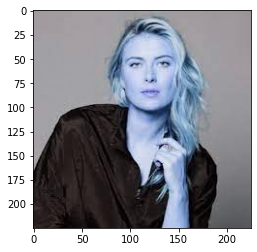

In [300]:
# OpenCV represents the images in BGR as opposed to the RGB we expect.Hence, the image is not in its true color.
img=cv2.imread('./dataset/maria_sharapova/maria034.jpg')
plt.imshow(img)

In [301]:
# We can convert the color space from BGR to RGB, and it shows its true colors.

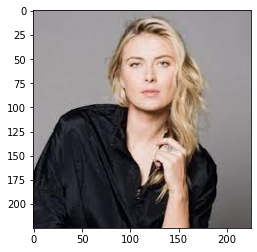

In [302]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#plt.imshow(img)

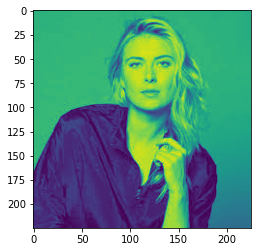

In [303]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [304]:
import numpy as np
import cv2
face_cascade = cv2.CascadeClassifier('C:/Code/SportsPersonClassifier/Model/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:/Code/SportsPersonClassifier/Model/opencv/haarcascades/haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[85, 28, 71, 71]], dtype=int32)

In [305]:
(x,y,w,h)=faces[0]
x,y,w,h

(85, 28, 71, 71)

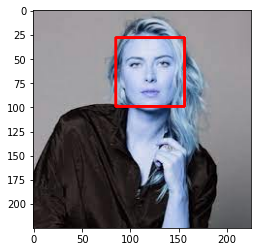

In [306]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img,cmap='gray')

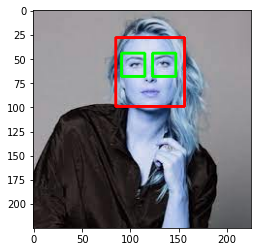

In [307]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)

    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()


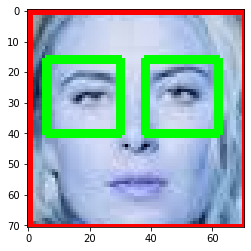

In [308]:
plt.imshow(roi_color,cmap='gray')

In [309]:
def get_cropped_image_if_2_eyes(image_path):
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

[[[ 47  64  83]
  [ 49  70  97]
  [ 51  73 109]
  ...
  [ 21  15   8]
  [ 23  17  12]
  [ 22  17  16]]

 [[ 48  64  80]
  [ 51  71  96]
  [ 58  78 113]
  ...
  [ 24  16   9]
  [ 25  17  10]
  [ 23  17  12]]

 [[ 46  59  73]
  [ 57  74  95]
  [ 80  98 129]
  ...
  [ 26  17   8]
  [ 27  18   9]
  [ 23  15   8]]

 ...

 [[110  96  74]
  [112  98  76]
  [114 100  78]
  ...
  [156 148 135]
  [156 152 141]
  [150 147 142]]

 [[109  95  72]
  [111  97  74]
  [113  99  76]
  ...
  [156 147 133]
  [157 151 138]
  [151 148 140]]

 [[108  94  71]
  [110  96  73]
  [112  98  75]
  ...
  [155 147 130]
  [159 152 137]
  [154 149 140]]]


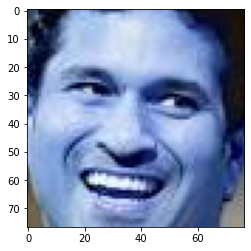

In [310]:
cropped_image=get_cropped_image_if_2_eyes("./dataset/sachin_tendulkar/sachin07.jpg")
print(cropped_image)
plt.imshow(cropped_image)

In [311]:
path_to_data="./dataset/"
path_to_cr_data="./dataset/cropped/"

In [312]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [313]:
img_dirs

['./dataset/cropped',
 './dataset/kapil_dev',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/sachin_tendulkar',
 './dataset/virat_kohli']

In [314]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [315]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/kapil_dev
Generating cropped images in folder:  ./dataset/cropped/maria_sharapova
Generating cropped images in folder:  ./dataset/cropped/roger_federer
Generating cropped images in folder:  ./dataset/cropped/sachin_tendulkar
Generating cropped images in folder:  ./dataset/cropped/virat_kohli


In [316]:
#Wavelet Transform of the images
import numpy as np
import pywt
import cv2

def w2d(img,mode='haar',level=1):
    imArray=img
    #Datatype Conversion
    #convert to grayscale
    imArray=cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    #convert to float
    imArray=np.float32(imArray)
    imArray /=255
    #compute coefficients
    coeffs=pywt.wavedec2(imArray,mode,level=level)
    
    #process coefficient
    coeffs_H=list(coeffs)
    coeffs_H[0]*=0
    
    #reconstruction
    imArray_H=pywt.waverec2(coeffs_H,mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

In [317]:
cropped_image

array([[[ 47,  64,  83],
        [ 49,  70,  97],
        [ 51,  73, 109],
        ...,
        [ 21,  15,   8],
        [ 23,  17,  12],
        [ 22,  17,  16]],

       [[ 48,  64,  80],
        [ 51,  71,  96],
        [ 58,  78, 113],
        ...,
        [ 24,  16,   9],
        [ 25,  17,  10],
        [ 23,  17,  12]],

       [[ 46,  59,  73],
        [ 57,  74,  95],
        [ 80,  98, 129],
        ...,
        [ 26,  17,   8],
        [ 27,  18,   9],
        [ 23,  15,   8]],

       ...,

       [[110,  96,  74],
        [112,  98,  76],
        [114, 100,  78],
        ...,
        [156, 148, 135],
        [156, 152, 141],
        [150, 147, 142]],

       [[109,  95,  72],
        [111,  97,  74],
        [113,  99,  76],
        ...,
        [156, 147, 133],
        [157, 151, 138],
        [151, 148, 140]],

       [[108,  94,  71],
        [110,  96,  73],
        [112,  98,  75],
        ...,
        [155, 147, 130],
        [159, 152, 137],
        [154, 149, 140]]

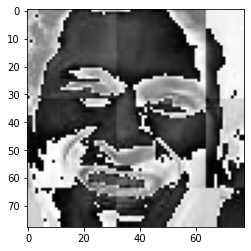

In [318]:
im_har=w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap='gray')


In [319]:
im_har.shape

(78, 78)

In [320]:
celebrity_file_names_dict

{'cropped': [],
 'kapil_dev': ['./dataset/cropped/kapil_dev/kapil_dev1.png',
  './dataset/cropped/kapil_dev/kapil_dev2.png',
  './dataset/cropped/kapil_dev/kapil_dev3.png',
  './dataset/cropped/kapil_dev/kapil_dev4.png',
  './dataset/cropped/kapil_dev/kapil_dev5.png',
  './dataset/cropped/kapil_dev/kapil_dev6.png',
  './dataset/cropped/kapil_dev/kapil_dev7.png',
  './dataset/cropped/kapil_dev/kapil_dev8.png',
  './dataset/cropped/kapil_dev/kapil_dev9.png',
  './dataset/cropped/kapil_dev/kapil_dev10.png',
  './dataset/cropped/kapil_dev/kapil_dev11.png',
  './dataset/cropped/kapil_dev/kapil_dev12.png',
  './dataset/cropped/kapil_dev/kapil_dev13.png',
  './dataset/cropped/kapil_dev/kapil_dev14.png',
  './dataset/cropped/kapil_dev/kapil_dev15.png',
  './dataset/cropped/kapil_dev/kapil_dev16.png',
  './dataset/cropped/kapil_dev/kapil_dev17.png',
  './dataset/cropped/kapil_dev/kapil_dev18.png',
  './dataset/cropped/kapil_dev/kapil_dev19.png',
  './dataset/cropped/kapil_dev/kapil_dev20.png',


In [321]:
class_dict={'kapil_dev':0,
            'maria_sharapova':1,
            'roger_federer':2,
            'sachin_tendulkar':3,
            'virat_kohli':4}

In [322]:
X,y=[],[]

for celebrity_name,training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img=cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img=cv2.resize(img,(32,32))
        img_har=w2d(img,'db1',5)
        scalled_img_har=cv2.resize(img_har,(32,32))
        combined_img=np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [323]:
len(X[0])

4096

In [324]:
32*32*3+32*32

4096

In [325]:
X=np.array(X).reshape(len(X),4096).astype(float)
X.shape

(203, 4096)

In [326]:
X[0].shape

(4096,)

### Data Cleaning is done, now train the model

we will use svm with rbf kernel tuned with heuristic finetuning

In [327]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


In [328]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
pipe=Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.7058823529411765

In [329]:
len(X_test)

51

In [330]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      1.00      0.81        11
           1       0.68      0.89      0.77        19
           2       0.80      0.50      0.62         8
           3       0.67      0.25      0.36         8
           4       1.00      0.40      0.57         5

    accuracy                           0.71        51
   macro avg       0.77      0.61      0.63        51
weighted avg       0.73      0.71      0.67        51



### Hyperparameter tuning using GridSearchCV

In [331]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [332]:
model_params={
    'svm':{
        'model':svm.SVC(gamma='auto',probability=True),
        'params':{
            'svc__C':[1,10,100,1000],
            'svc__kernel':['rbf','linear']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'randomforestclassifier__n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'logisticregression__C':[1,5,10]
        }
    }
}

In [333]:
score=[]
best_estimators={}
import pandas as pd
for algo,mp in model_params.items():
    pipe=make_pipeline(StandardScaler(),mp['model'])
    clf=GridSearchCV(pipe,mp['params'],cv=5,return_train_score=True)
    clf.fit(X_train,y_train)
    score.append({
        'model':algo,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
    best_estimators[algo]=clf.best_estimator_
    
df=pd.DataFrame(score,columns=['model','best_score','best_params'])
df
        

,model,best_score,best_params
0,svm,0.750323,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.670753,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.776344,{'logisticregression__C': 5}


In [334]:
best_estimators['svm'].score(X_test,y_test)

0.7058823529411765

In [335]:
best_estimators['random_forest'].score(X_test,y_test)

0.6666666666666666

In [336]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.9411764705882353

In [337]:
best_clf=best_estimators['svm']

In [338]:
best_clf

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=10, gamma='auto', probability=True))])

In [339]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,best_clf.predict(X_test))
cm

array([[11,  0,  0,  0,  0],
       [ 2, 17,  0,  0,  0],
       [ 0,  3,  4,  1,  0],
       [ 2,  4,  0,  2,  0],
       [ 1,  1,  1,  0,  2]], dtype=int64)

Text(69.0, 0.5, 'Truth')

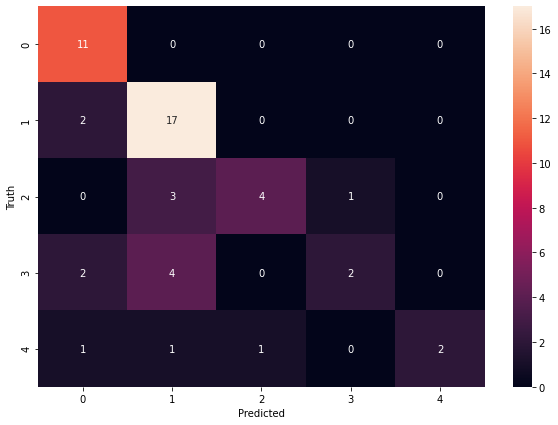

In [340]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [341]:
class_dict

{'kapil_dev': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'sachin_tendulkar': 3,
 'virat_kohli': 4}

### Save the model

In [342]:
import joblib
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

### Save Class Dictionary

In [343]:
import json
with open('class_dictionary.json','w') as f:
    f.write(json.dumps(class_dict))